<a href="https://colab.research.google.com/github/bonsoirpedro/TelecomX_BR/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [53]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

import pandas as pd
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [54]:
dados = df.to_dict(orient='records')
df_normalizado = pd.json_normalize(dados)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [55]:
# analisar inconsistencias , nulos e duplicados
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [56]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [57]:
df_normalizado.isnull().mean() * 100

,0
customerID,0.0
Churn,0.0
customer.gender,0.0
customer.SeniorCitizen,0.0
customer.Partner,0.0
customer.Dependents,0.0
customer.tenure,0.0
phone.PhoneService,0.0
phone.MultipleLines,0.0
internet.InternetService,0.0


In [58]:
df_normalizado[df_normalizado.isnull().any(axis=1)]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [59]:
df_normalizado.dropna(inplace=True)
df_normalizado.dropna(axis=1, inplace=True)

In [60]:
df_normalizado.fillna(0, inplace=True)
df_normalizado.fillna(method='ffill', inplace=True)

In [61]:
df_normalizado[df_normalizado.duplicated()]

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [62]:
df_normalizado.drop_duplicates(inplace=True)

In [63]:
df_normalizado.dtypes

,0
customerID,object
Churn,object
customer.gender,object
customer.SeniorCitizen,int64
customer.Partner,object
customer.Dependents,object
customer.tenure,int64
phone.PhoneService,object
phone.MultipleLines,object
internet.InternetService,object


In [64]:
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [65]:
colunas_booleanas = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
                     'phone.MultipleLines', 'internet.OnlineBackup', 'internet.DeviceProtection',
                     'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                     'account.PaperlessBilling', 'internet.OnlineSecurity']

for col in colunas_booleanas:
    df_normalizado[col] = df_normalizado[col].map({'Yes': True, 'No': False})
    df_normalizado[col] = df_normalizado[col].astype('boolean')  # aceita True/False/NaN

In [66]:
df_normalizado['Churn'] = df_normalizado['Churn'].replace('nan', False)

In [67]:
colunas_strings = ['customerID', 'customer.gender', 'internet.InternetService',
                   'account.Contract', 'account.PaymentMethod']

for col in colunas_strings:
  df_normalizado[col] = df_normalizado[col].astype('string')

In [68]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        6560 non-null   boolean
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    5686 non-null   boolean
 11  internet.OnlineBackup      5686 non-null   boolean
 12  internet.DeviceProtection  5686 non-null   boolean
 13  internet.TechSupport       5686 non-null   boole

In [69]:
print(df_normalizado['Churn'].unique())
print(df_normalizado['phone.MultipleLines'].unique())

<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean


In [70]:
df_normalizado = df_normalizado.replace('nan', False)

In [71]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        6560 non-null   boolean
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    5686 non-null   boolean
 11  internet.OnlineBackup      5686 non-null   boolean
 12  internet.DeviceProtection  5686 non-null   boolean
 13  internet.TechSupport       5686 non-null   boole

In [72]:
df_normalizado.dtypes

,0
customerID,string[python]
Churn,boolean
customer.gender,string[python]
customer.SeniorCitizen,int64
customer.Partner,boolean
customer.Dependents,boolean
customer.tenure,int64
phone.PhoneService,boolean
phone.MultipleLines,boolean
internet.InternetService,string[python]


In [73]:
import numpy as np

df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

In [74]:
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,True,False,True,True,False,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,False,True,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,False,True,False,False,False,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,True,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,False,True,True,False,Month-to-month,True,Mailed check,83.90,267.40
5,0013-MHZWF,False,Female,0,False,True,9,True,False,DSL,...,False,False,True,True,True,Month-to-month,True,Credit card (automatic),69.40,571.45
6,0013-SMEOE,False,Female,1,True,False,71,True,False,Fiber optic,...,True,True,True,True,True,Two year,True,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,False,Male,0,True,False,63,True,True,Fiber optic,...,False,False,True,False,False,Two year,True,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,False,Female,1,False,False,7,True,False,DSL,...,False,False,False,False,False,Month-to-month,True,Electronic check,48.20,340.35
9,0016-QLJIS,False,Female,0,True,True,65,True,True,DSL,...,True,True,True,True,True,Two year,True,Mailed check,90.45,5957.90


In [75]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   string 
 1   Churn                      7043 non-null   boolean
 2   customer.gender            7267 non-null   string 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   boolean
 5   customer.Dependents        7267 non-null   boolean
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   boolean
 8   phone.MultipleLines        6560 non-null   boolean
 9   internet.InternetService   7267 non-null   string 
 10  internet.OnlineSecurity    5686 non-null   boolean
 11  internet.OnlineBackup      5686 non-null   boolean
 12  internet.DeviceProtection  5686 non-null   boolean
 13  internet.TechSupport       5686 non-null   boole

In [76]:
(df_normalizado == 'nan').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [77]:
df_normalizado['ContaDiaria'] = df_normalizado['account.Charges.Monthly'] / 30
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,ContaDiaria
0,0002-ORFBO,False,Female,0,True,True,9,True,False,DSL,...,False,True,True,False,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,True,True,DSL,...,False,False,False,True,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fiber optic,...,True,False,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fiber optic,...,True,False,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fiber optic,...,False,True,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [78]:
# tradução das colunas
df_normalizado = df_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'cancelou',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'possui_parceiro',
    'customer.Dependents': 'possui_dependentes',
    'customer.tenure': 'meses_de_vinculo',
    'phone.PhoneService': 'servico_telefonico',
    'phone.MultipleLines': 'multiplas_linhas_telefonicas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'internet.OnlineSecurity': 'seguranca_online',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'forma_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'valor_total'
})

In [79]:
mapeamento_ingles_portugues = {
    # tipo_contrato
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal',

    # tipo_internet
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'No': 'Sem internet',

    # forma_pagamento
    'Mailed check': 'Boleto por Correio',
    'Electronic check': 'Débito automático',
    'Credit card (automatic)': 'Cartão automático',
    'Bank transfer (automatic)': 'Transferência bancária automática'
}


In [80]:
colunas_para_traduzir = ['tipo_contrato', 'tipo_internet', 'forma_pagamento']

for col in colunas_para_traduzir:
    df_normalizado[col] = df_normalizado[col].replace(mapeamento_ingles_portugues)

In [81]:
df_normalizado = df_normalizado.dropna()

#📊 Carga e análise

In [82]:
df_normalizado.describe()

,idoso,meses_de_vinculo,valor_mensal,valor_total,ContaDiaria
count,4832.000000,4832.000000,4832.000000,4832.000000,4832.000000
mean,0.204056,33.056705,81.761207,2902.470788,2.725374
std,0.403052,24.636200,18.306134,2415.564128,0.610204
min,0.000000,1.000000,42.900000,42.900000,1.430000
25%,0.000000,9.000000,69.787500,659.600000,2.326250
50%,0.000000,30.000000,82.500000,2350.625000,2.750000
75%,0.000000,56.000000,95.700000,4871.150000,3.190000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [84]:
df_normalizado[df_normalizado['cancelou'] == True].head(20)

,id_cliente,cancelou,genero,idoso,possui_parceiro,possui_dependentes,meses_de_vinculo,servico_telefonico,multiplas_linhas_telefonicas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,forma_pagamento,valor_mensal,valor_total,ContaDiaria
2,0004-TLHLJ,True,Male,0,False,False,4,True,False,Fibra óptica,...,True,False,False,False,Mensal,True,Débito automático,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,True,False,Fibra óptica,...,True,False,True,True,Mensal,True,Débito automático,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,True,False,Fibra óptica,...,False,True,True,False,Mensal,True,Boleto por Correio,83.90,267.40,2.796667
18,0022-TCJCI,True,Male,1,False,False,45,True,False,DSL,...,True,False,False,True,Anual,False,Cartão automático,62.70,2791.50,2.090000
21,0023-XUOPT,True,Female,0,True,False,13,True,True,Fibra óptica,...,True,False,True,False,Mensal,False,Débito automático,94.10,1215.60,3.136667
41,0067-DKWBL,True,Male,1,False,False,2,True,False,DSL,...,False,False,False,False,Mensal,True,Débito automático,49.25,91.10,1.641667
54,0093-XWZFY,True,Male,0,False,False,40,True,True,Fibra óptica,...,True,False,True,True,Mensal,True,Cartão automático,104.50,4036.85,3.483333
55,0094-OIFMO,True,Female,1,False,False,11,True,False,Fibra óptica,...,False,False,True,True,Mensal,True,Débito automático,95.00,1120.30,3.166667
65,0107-YHINA,True,Male,0,False,True,1,True,True,Fibra óptica,...,True,False,True,True,Mensal,True,Débito automático,99.75,99.75,3.325000
68,0112-QWPNC,True,Male,0,True,False,49,True,True,DSL,...,True,True,True,True,Anual,False,Débito automático,84.35,4059.35,2.811667


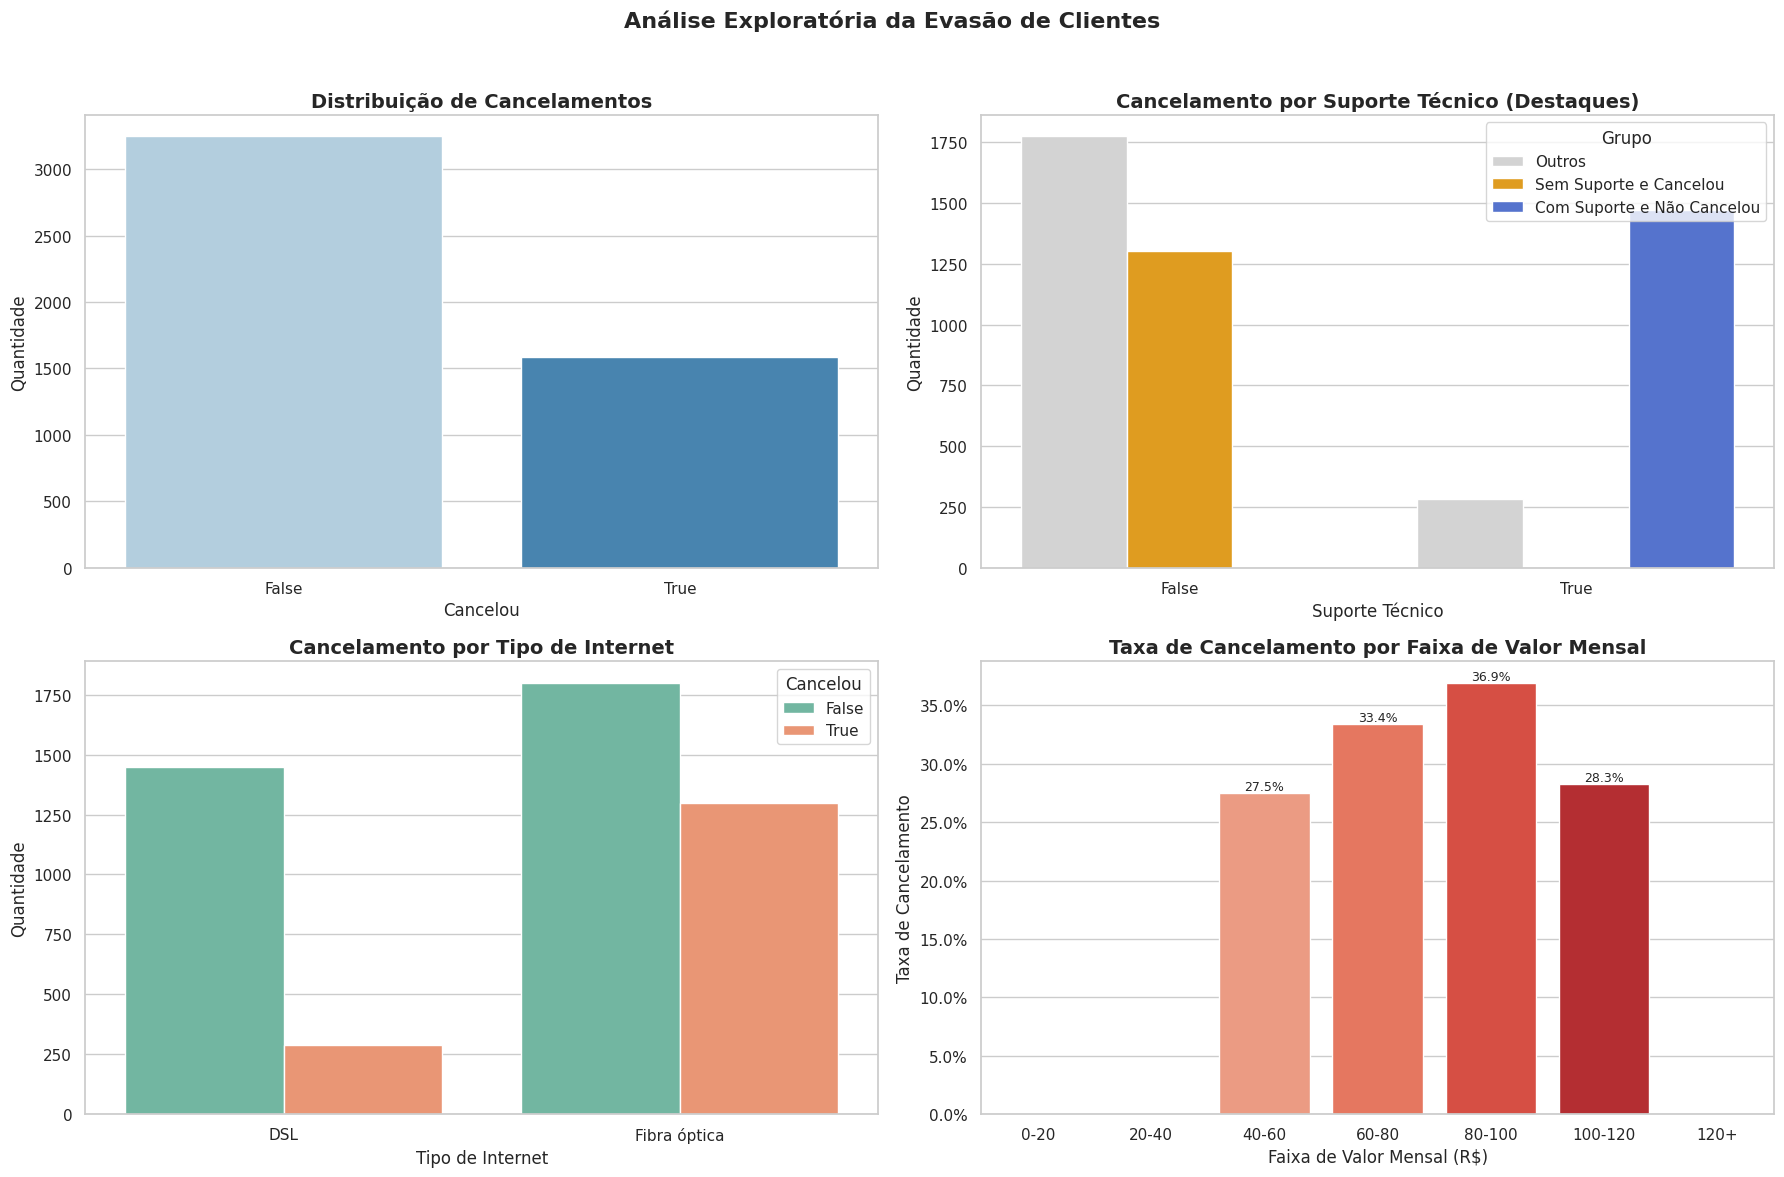

In [97]:
import matplotlib.ticker as mtick
# Gráfico 1 – Número de Evasão Total
numero_evasao = df_normalizado['cancelou'].value_counts()

# Gráfico 2 – Evasão por Suporte Técnico
numero_evasao_tecnico = (
    df_normalizado
    .groupby(['suporte_tecnico', 'cancelou'])
    .size()
    .reset_index(name='quantidade')
)

# Gráfico 3 – Evasão por Tipo de Internet
numero_evasao_internet = (
    df_normalizado
    .groupby(['tipo_internet', 'cancelou'])
    .size()
    .reset_index(name='quantidade')
)

# Gráfico 4 – Taxa de Cancelamento por Faixa de Valor Mensal

# Definir as faixas (bins)
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120+']

df_normalizado['faixa_valor_mensal'] = pd.cut(df_normalizado['valor_mensal'], bins=bins + [df_normalizado['valor_mensal'].max() if df_normalizado['valor_mensal'].max() > bins[-1] else bins[-1] + 1], labels=labels, right=False)

taxa_evasao = (
    df_normalizado
    .groupby('faixa_valor_mensal')
    .agg(total_clientes=('cancelou', 'count'),
         total_cancelamentos=('cancelou', 'sum'))
    .assign(taxa_cancelamento=lambda x: x['total_cancelamentos'] / x['total_clientes'])
    .reset_index()
)

# Estilo
sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Gráfico (0,0): Número de Evasão
sns.barplot(ax=axes[0, 0], x=numero_evasao.index, y=numero_evasao.values, palette='Blues', hue=numero_evasao.index, legend=False)
axes[0, 0].set_title('Distribuição de Cancelamentos', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Cancelou')
axes[0, 0].set_ylabel('Quantidade')


# Gráfico (0,1): Evasão por Suporte Técnico

# Criar coluna combinada de categorias
numero_evasao_tecnico['grupo'] = numero_evasao_tecnico.apply(
    lambda row: 'Sem Suporte e Cancelou' if (row['suporte_tecnico'] == False and row['cancelou'] == True)
    else 'Com Suporte e Não Cancelou' if (row['suporte_tecnico'] == True and row['cancelou'] == False)
    else 'Outros',
    axis=1
)

# Definir cores personalizadas
cores_personalizadas = {
    'Sem Suporte e Cancelou': 'orange',
    'Com Suporte e Não Cancelou': 'royalblue',
    'Outros': 'lightgray'
}

# Plot
sns.barplot(
    ax=axes[0, 1],
    data=numero_evasao_tecnico,
    x='suporte_tecnico',
    y='quantidade',
    hue='grupo',
    palette=cores_personalizadas
)

axes[0, 1].set_title('Cancelamento por Suporte Técnico (Destaques)', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Suporte Técnico')
axes[0, 1].set_ylabel('Quantidade')
axes[0, 1].legend(title='Grupo', loc='upper right')

# Gráfico (1,0): Evasão por Tipo de Internet
sns.barplot(
    ax=axes[1, 0],
    data=numero_evasao_internet,
    x='tipo_internet',
    y='quantidade',
    hue='cancelou',
    palette='Set2'
)
axes[1, 0].set_title('Cancelamento por Tipo de Internet', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Tipo de Internet')
axes[1, 0].set_ylabel('Quantidade')
axes[1, 0].legend(title='Cancelou', loc='upper right')

# Gráfico (1,1): Taxa de Cancelamento por Faixa de Valor
sns.barplot(
    ax=axes[1, 1],
    data=taxa_evasao,
    x='faixa_valor_mensal',
    y='taxa_cancelamento',
    palette='Reds'
)
axes[1, 1].set_title('Taxa de Cancelamento por Faixa de Valor Mensal', fontsize=14, weight='bold')
axes[1, 1].set_xlabel('Faixa de Valor Mensal (R$)')
axes[1, 1].set_ylabel('Taxa de Cancelamento')
axes[1, 1].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for p in axes[1, 1].patches:
    height = p.get_height()
    axes[1, 1].annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9)

plt.suptitle('Análise Exploratória da Evasão de Clientes', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('subplots.png')

plt.show()

In [86]:
numero_evasao_vinculo = (df_normalizado.groupby(['meses_de_vinculo', 'cancelou']).size().reset_index(name='quantidade'))

fig = px.bar(
    numero_evasao_vinculo,
    x='meses_de_vinculo',
    y='quantidade',
    color='cancelou',
    barmode='group',
    labels={
        'meses_de_vinculo': 'Meses de Vínculo',
        'quantidade': 'Quantidade de Clientes',
        'cancelou': 'Cancelou'
    },
    title='Número de Evasões por Meses de Vínculo',
    color_discrete_map={True: 'red', False: 'green'}
)

fig.update_layout(
    xaxis_title='Meses de Vínculo',
    yaxis_title='Quantidade de Clientes',
    legend_title='Cancelou'
)

fig.show()

In [87]:
df_taxa_evasao = (
    df_normalizado
    .groupby('meses_de_vinculo')
    .agg(
        total_clientes=('cancelou', 'count'),
        total_cancelamentos=('cancelou', 'sum')
    )
    .assign(
        taxa_cancelamento=lambda x: x['total_cancelamentos'] / x['total_clientes']
    )
    .reset_index()
)


In [88]:
import plotly.graph_objects as go

# Agrupando os dados
df_multi = (
    df_normalizado
    .groupby('meses_de_vinculo')
    .agg(
        total_cancelamentos=('cancelou', 'sum'),
        total_clientes=('cancelou', 'count'),
        valor_medio_mensal=('valor_mensal', 'mean')
    )
    .assign(
        taxa_cancelamento=lambda x: x['total_cancelamentos'] / x['total_clientes']
    )
    .reset_index()
)

fig = go.Figure()

# Linha taxa de cancelamento (eixo y esquerdo)
fig.add_trace(go.Scatter(
    x=df_multi['meses_de_vinculo'],
    y=df_multi['taxa_cancelamento'],
    mode='lines+markers',
    name='Taxa de Cancelamento (%)',
    yaxis='y1',
    line=dict(color='red')
))

# Linha valor médio mensal (eixo y direito)
fig.add_trace(go.Scatter(
    x=df_multi['meses_de_vinculo'],
    y=df_multi['valor_medio_mensal'],
    mode='lines+markers',
    name='Valor Médio Mensal (R$)',
    yaxis='y2',
    line=dict(color='green')
))

# Layout com dois eixos y
fig.update_layout(
    title='Taxa de Cancelamento e Valor Médio Mensal por Tempo de Vínculo',
    xaxis=dict(
        title='Meses de Vínculo',
        range=[df_multi['meses_de_vinculo'].min(), df_multi['meses_de_vinculo'].max()] # Moved range inside xaxis dict
    ),

    yaxis=dict(
        title='Taxa de Cancelamento (%)',
        tickformat='.0%',
        titlefont=dict(color='red'),
        tickfont=dict(color='red'),
        side='left',
        range=[df_multi['taxa_cancelamento'].min(), df_multi['taxa_cancelamento'].max()]
    ),

    yaxis2=dict(
        title='Valor Médio Mensal (R$)',
        titlefont=dict(color='green'),
        tickfont=dict(color='green'),
        anchor='x',
        overlaying='y',
        side='right',
        range=[df_multi['valor_medio_mensal'].min(), df_multi['valor_medio_mensal'].max()]
    ),

    legend=dict(x=0.01, y=0.99),
    hovermode='x unified',
    margin=dict(r=60)
)

fig.show()

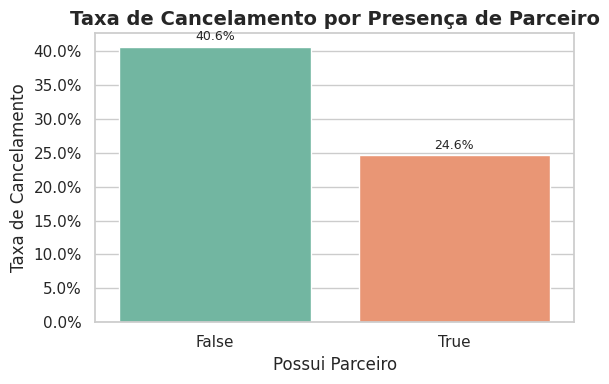

In [89]:
taxa_parceiro = (
    df_normalizado.groupby('possui_parceiro')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)

plt.figure(figsize=(6, 4))
sns.barplot(data=taxa_parceiro, x='possui_parceiro', y='taxa_cancelamento', palette='Set2', hue='possui_parceiro', legend=False)
plt.title('Taxa de Cancelamento por Presença de Parceiro', fontsize=14, weight='bold')
plt.xlabel('Possui Parceiro')
plt.ylabel('Taxa de Cancelamento')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for index, row in taxa_parceiro.iterrows():
    plt.text(index, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_parceiro.png')
plt.show()



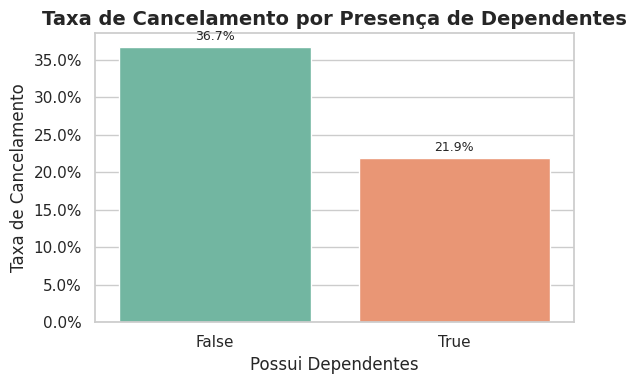

In [90]:
taxa_dependente = (
    df_normalizado.groupby('possui_dependentes')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)

plt.figure(figsize=(6, 4))
sns.barplot(data=taxa_dependente, x='possui_dependentes', y='taxa_cancelamento', palette='Set2', hue='possui_dependentes', legend=False)
plt.title('Taxa de Cancelamento por Presença de Dependentes', fontsize=14, weight='bold')
plt.xlabel('Possui Dependentes')
plt.ylabel('Taxa de Cancelamento')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for index, row in taxa_dependente.iterrows():
    plt.text(index, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_dependentes.png')
plt.show()


In [91]:
servicos = [
    'seguranca_online',
    'backup_online',
    'protecao_dispositivo',
    'suporte_tecnico',
    'streaming_tv',
    'streaming_filmes'
]

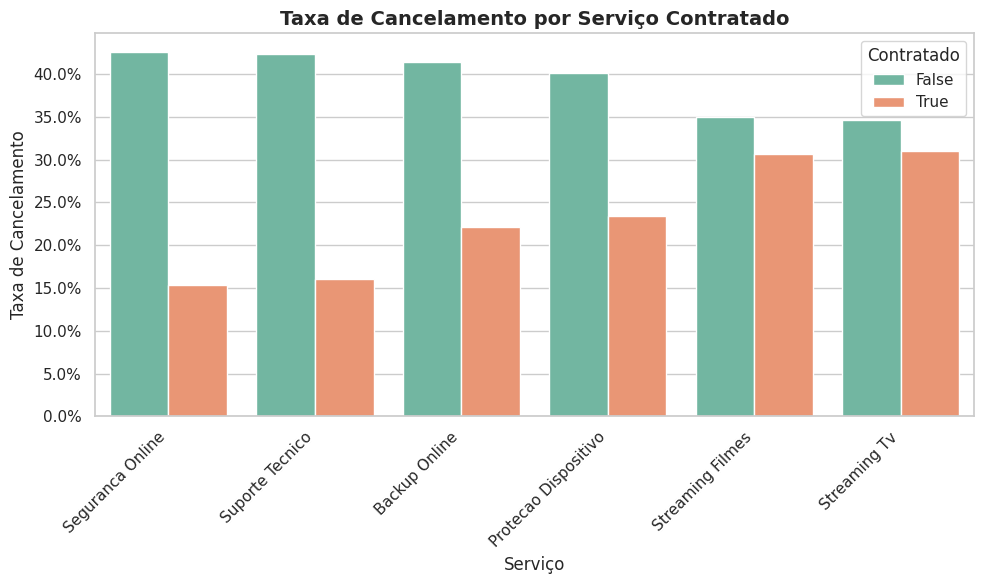

In [92]:
# Preparar dados
taxas_servicos = []

for servico in servicos:
    temp = (
        df_normalizado.groupby(servico)['cancelou']
        .mean()
        .reset_index()
        .rename(columns={servico: 'contratado'})
    )
    temp['servico'] = servico
    taxas_servicos.append(temp)

taxas_servicos_df = pd.concat(taxas_servicos).sort_values(by='cancelou', ascending=False)

# Renomear para exibição mais amigável (opcional)
taxas_servicos_df['servico'] = taxas_servicos_df['servico'].str.replace('_', ' ').str.title()

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=taxas_servicos_df,
    x='servico',
    y='cancelou',
    hue='contratado',
    palette='Set2'
)
plt.title('Taxa de Cancelamento por Serviço Contratado', fontsize=14, weight='bold')
plt.xlabel('Serviço')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.legend(title='Contratado')
plt.tight_layout()
plt.savefig('taxa_servicos.png')
plt.show()


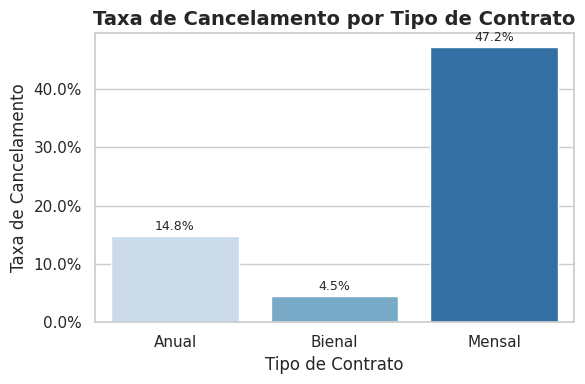

In [93]:
# Agrupar e calcular taxa
taxa_contrato = (
    df_normalizado.groupby('tipo_contrato')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)

# Gráfico
plt.figure(figsize=(6, 4))
sns.barplot(data=taxa_contrato, x='tipo_contrato', y='taxa_cancelamento', palette='Blues', hue='tipo_contrato', legend=False)
plt.title('Taxa de Cancelamento por Tipo de Contrato', fontsize=14, weight='bold')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Taxa de Cancelamento')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Rótulos
for i, row in taxa_contrato.iterrows():
    plt.text(i, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_contrato.png')
plt.show()


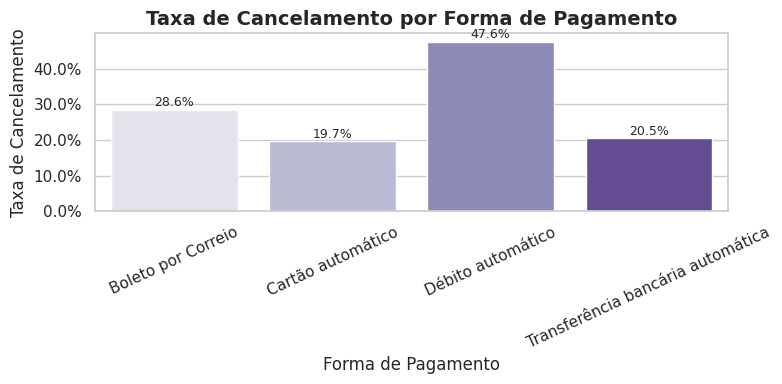

In [94]:
# Agrupar e calcular taxa
taxa_pagamento = (
    df_normalizado.groupby('forma_pagamento')['cancelou']
    .mean()
    .reset_index(name='taxa_cancelamento')
)


# Gráfico
plt.figure(figsize=(8, 4))
sns.barplot(data=taxa_pagamento, x='forma_pagamento', y='taxa_cancelamento', palette='Purples', hue='forma_pagamento', legend=False)
plt.title('Taxa de Cancelamento por Forma de Pagamento', fontsize=14, weight='bold')
plt.xlabel('Forma de Pagamento')
plt.ylabel('Taxa de Cancelamento')
plt.xticks(rotation=25)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

for i, row in taxa_pagamento.iterrows():
    plt.text(i, row['taxa_cancelamento'] + 0.01, f'{row["taxa_cancelamento"]:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('taxa_pagamento.png')
plt.show()


In [95]:
# Correlação
correlacao_conta_diaria = df_normalizado[['ContaDiaria', 'cancelou']].corr().iloc[0, 1]
print(f"Correlação entre Conta Diária e Cancelamento: {correlacao_conta_diaria:.2f}")


Correlação entre Conta Diária e Cancelamento: 0.02


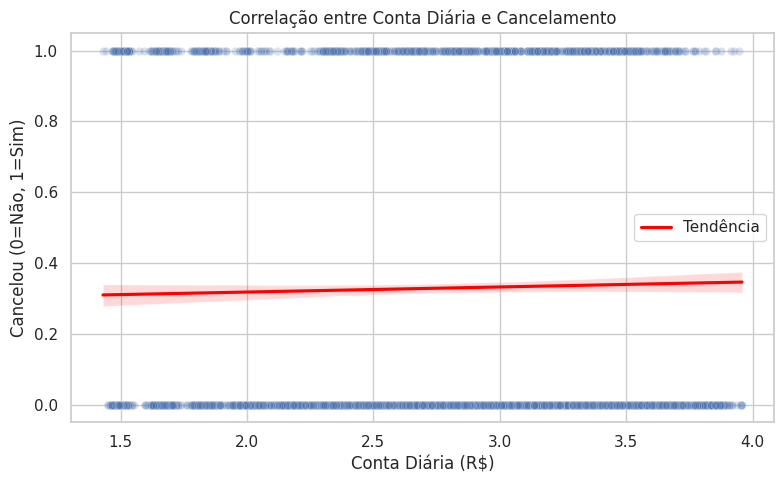

In [96]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_normalizado, x='ContaDiaria', y='cancelou', alpha=0.2)
sns.regplot(data=df_normalizado, x='ContaDiaria', y='cancelou', scatter=False, color='red', label='Tendência')
plt.title('Correlação entre Conta Diária e Cancelamento')
plt.xlabel('Conta Diária (R$)')
plt.ylabel('Cancelou (0=Não, 1=Sim)')
plt.legend()
plt.tight_layout()
plt.savefig('correlacao_conta_diaria.png')
plt.show()


#📄Relatorio Final

**Introdução**

O objetivo desta análise foi identificar os principais fatores relacionados à evasão (churn) de clientes da empresa TelecomX. A empresa observou uma alta taxa de cancelamento dos serviços, atingindo cerca de metade da sua base de clientes. Por isso, buscou-se compreender os padrões e variáveis que mais contribuem para esse fenômeno, com o intuito de apoiar estratégias de retenção.


**Limpeza e Tratamento de Dados**

O conjunto de dados foi inicialmente fornecido no formato JSON, exigindo a transformação para um DataFrame pandas. Isso envolveu:

* Conversão de colunas compostas por dicionários em colunas planas.

* Remoção de valores duplicados e de valores ausentes (NaN).

* Padronização de valores mal digitados como 'nan' (string).

* Tradução dos nomes das colunas e dos dados categóricos para o português facilitando a interpretação.

* Conversão de variáveis booleanas ("Yes"/"No") para True/False.

* Criação de novas variáveis auxiliares como:

  * ContaDiaria (valor mensal dividido pelos dias do mês).

  * faixa_valor_mensal (agrupamento em bins).

  * total_servicos (quantidade de serviços contratados).


**Análise Exploratória de Dados**

A etapa exploratória incluiu gráficos de barra, dispersão e linha, visando relacionar o churn com diferentes variáveis. Os principais achados foram:

* A quantidade de churns foi significativa, com quase 30% da base tendo cancelado.

* Clientes sem suporte técnico ou segurança online apresentaram maior probabilidade de cancelamento.

* O tipo de internet "Fibra Óptica" concentrou mais cancelamentos em comparação a tecnologias mais antigas, como o DSL.

* Clientes mais novos (com menos meses de vínculo) demonstraram maior tendência ao churn.

* Não houve evidência de correlação significativa entre o valor da conta diária e o cancelamento.

* Quanto maior o número de serviços contratados, menor a chance de evasão.

* A forma de pagamento por débito automático esteve associada a taxas mais altas de cancelamento.

* O tipo de contrato mensal também apresentou maior taxa de churn.

* Não foram encontradas diferenças relevantes de cancelamento com base no gênero.

* Clientes sem parceiro(a) cancelaram mais, enquanto quem possuía dependentes permaneceu mais tempo.


**Conclusões e Insights**

A evasão de clientes está fortemente relacionada à percepção de suporte e segurança. Clientes que não contrataram serviços como segurança online, backup ou suporte técnico apresentaram maiores índices de cancelamento. Além disso, clientes com poucos meses de vínculo (novatos) tendem a abandonar mais cedo, o que pode indicar problemas na experiência inicial com o serviço.

Outro achado importante é a alta evasão entre usuários de fibra óptica, o que pode estar relacionado a falhas de implementação ou à fase de transição tecnológica. Modelos de contrato e forma de pagamento também influenciam diretamente o comportamento de saída.



